In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler


In [10]:

df = pd.read_csv('accent-mfcc-data-1.csv')

df.head()

,language,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
0,ES,7.071476,-6.512900,7.650800,11.150783,-7.657312,12.484021,-11.709772,3.426596,1.462715,-2.812753,0.866538,-5.244274
1,ES,10.982967,-5.157445,3.952060,11.529381,-7.638047,12.136098,-12.036247,3.491943,0.595441,-4.508811,2.332147,-6.221857
2,ES,7.827108,-5.477472,7.816257,9.187592,-7.172511,11.715299,-13.847214,4.574075,-1.687559,-7.204041,-0.011847,-6.463144
3,ES,6.744083,-5.688920,6.546789,9.000183,-6.924963,11.710766,-12.374388,6.169879,-0.544747,-6.019237,1.358559,-6.356441
4,ES,5.836843,-5.326557,7.472265,8.847440,-6.773244,12.677218,-12.315061,4.416344,0.193500,-3.644812,2.151239,-6.816310


In [11]:
X = df.drop(['language'], axis=1)

y = df["language"]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

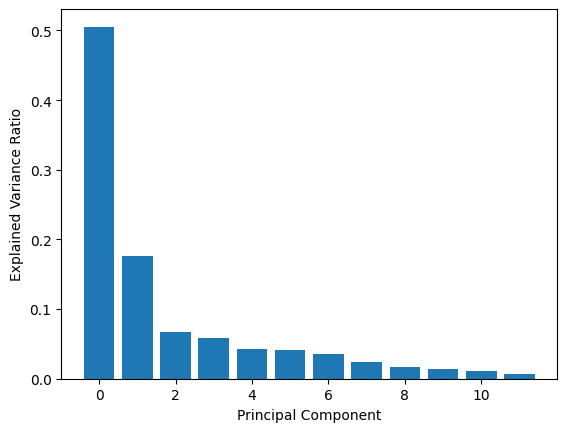

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assume X is your data matrix

pca = PCA()
pca.fit(X)
explained_var_ratio = pca.explained_variance_ratio_

plt.bar(np.arange(len(explained_var_ratio)), explained_var_ratio)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()


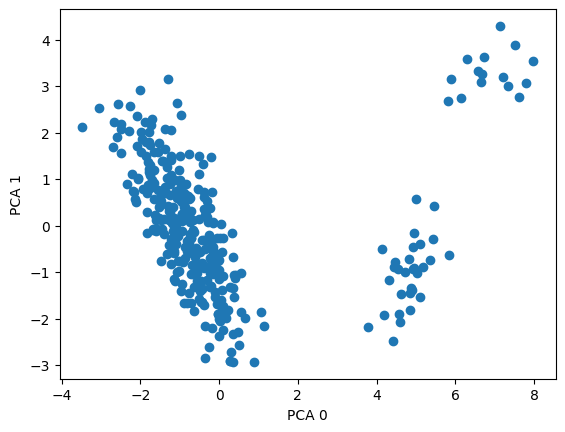

In [14]:
X=StandardScaler().fit_transform(X)
pca=PCA(n_components=2)
principal_components = pca.fit(X)

X = pca.transform(X)

import matplotlib.pyplot as plt
# Visualize the transformed data
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('PCA 0')
plt.ylabel('PCA 1')
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

0.43119266055045874


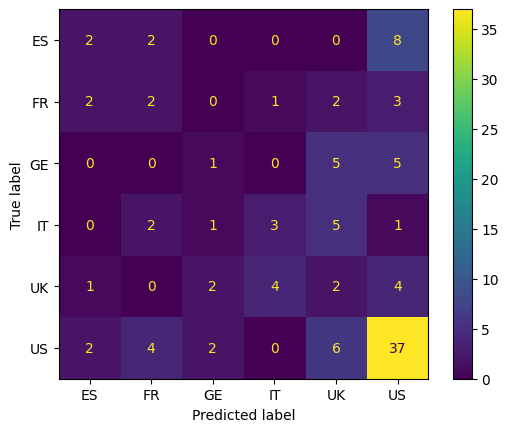

In [15]:
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_pred=y_pred, y_true=y_test)
